In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/david_king/Desktop/Everything/11_Git/ML_code/01_회귀분석'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv("../00_Data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]

print('nCar: %d' % nCar, '\nnVar: %d' % nVar )

nCar: 1436 
nVar: 37


### 범주형 변수를 이진형 변수로 변환

In [5]:
# 가변수 생성
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
# 연료타입에 대한 위치 인덱스 저장
p_idx = np.array(corolla['Fuel_Type'] == 'Petrol')
d_idx = np.array(corolla['Fuel_Type'] == 'Diesel')
c_idx = np.array(corolla['Fuel_Type'] == 'CNG')

p_idx

array([False, False, False, ...,  True,  True,  True])

In [7]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1 # Petrol
dummy_d[d_idx] = 1 # Diesel
dummy_c[c_idx] = 1 # CNG

dummy_d

array([1, 1, 1, ..., 0, 0, 0])

### 불필요한 변수 제거 및 가변수 추가

In [8]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})
display(Fuel.head())

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat([corolla_, Fuel], axis=1)
display(mlr_data)

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [9]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [10]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [11]:
# Train the MLR / 회귀모델 적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [12]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     289.3
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:04:27   Log-Likelihood:                -8476.2
No. Observations:                1005   AIC:                         1.702e+04
Df Residuals:                     971   BIC:                         1.719e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -489.1872    139.411     -3.509      0.000    -762.770    -215.605
Age_08_04         -123.1777      4.230    -29.118      0.000    -131.479    -114.876
Airbag_1            66.8421    270.965      0.247      0.805    -464.902     598.586
Airbag_2            14.9256    140.870      0.106      0.916    -261.519     291.370
Airco              114.2501     99.790      1.145      0.253     -81.579     310.079
Automatic          269.5772    168.287      1.602      0.110     -60.672     599.826
Automatic_airco   2425.6211    204.359     11.869      0.000    2024.586    2826.656
BOVAG_Guarantee    402.0271    137.781      2.918      0.004     131.643     672.411
Backseat_Divider  -228.5432    142.286     -1.606      0.109    -507.766      50.680
Boardcomputer     -303.5851    124.699     -2.435      0.015    -548.296     -58.874
CD_Player          141.8725    105.482      1.345      0.179     -65.127     348.872
CNG               -973.6299    263.290     -3.698      0.000   -1490.313    -456.947
Central_Lock         4.4267    156.729      0.028      0.977    -303.139     311.993
Cylinders           -0.0338      0.002    -14.467      0.000      -0.038      -0.029
Diesel            -138.0754    203.383     -0.679      0.497    -537.196     261.046
Doors               66.9718     43.630      1.535      0.125     -18.647     152.591
Gears               33.6758    217.184      0.155      0.877    -392.529     459.880
Guarantee_Period    73.4982     13.633      5.391      0.000      46.746     100.251
HP                  20.8092      3.871      5.375      0.000      13.212      28.407
KM                  -0.0162      0.001    -11.780      0.000      -0.019      -0.014
Met_Color          -27.2340     82.329     -0.331      0.741    -188.797     134.330
Metallic_Rim       181.8397    103.501      1.757      0.079     -21.271     384.951
Mfg_Month         -103.0169     11.096     -9.284      0.000    -124.791     -81.242
Mfg_Year             1.9241      0.869      2.214      0.027       0.219       3.629
Mfr_Guarantee      252.2151     79.641      3.167      0.002      95.927     408.504
Mistlamps           72.5273    116.879      0.621      0.535    -156.838     301.892
Petrol            1111.6968    203.154      5.472      0.000     713.026    1510.368
Power_Steering     243.8773    315.960      0.772      0.440    -376.167     863.921
Powered_Windows    331.3203    158.928      2.085      0.037      19.438     643.203
Quarterly_Tax       17.5563      1.935      9.074      0.000      13.759      21.353
Radio            -1513.8664   1167.708     -1.296      0.195   -3805.389     777.656
Radio_cassette    1341.4011   1172.170      1.144      0.253    -958.878    3641.680
Sport_Model        377.3818     97.804      3.859      0.000     185.450     569.314
Tow_Bar           -222.

### VIF를 통한 다중공선성 확인

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns

vif

/Users/david_king/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/david_king/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


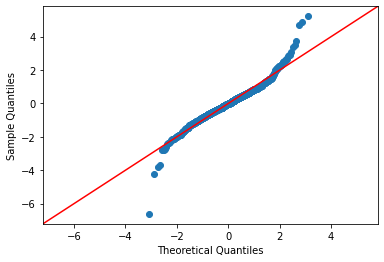

In [14]:
# 학습데이터 잔차 확인
import matplotlib.pyplot as plt

# 잔차
res = fitted_full_model.resid
pred_y = fitted_full_model.predict(train_x)

# q-q plot (정규분포 확인)
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

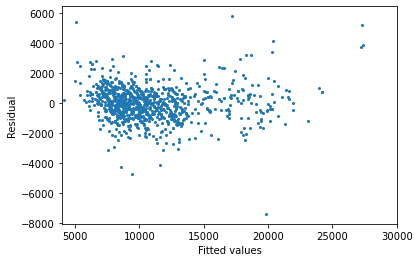

In [15]:
# 잔차 패턴 확인
plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel("Fitted values")
plt.ylabel('Residual')

In [16]:
# 검증데이터에 대해서
pred_y = fitted_full_model.predict(test_x)

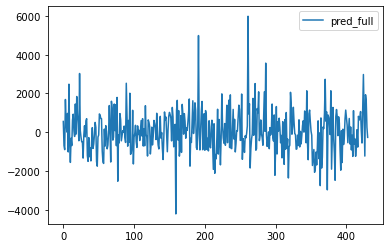

In [17]:
plt.plot(np.array(test_y - pred_y), label='pred_full')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true= test_y, y_pred= pred_y)

1199575.0565452196

# 변수선택법

In [19]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # Model learing
    AIC = regr.aic
    return {"model": regr, "AIC": AIC}

print(processSubset(X=train_x, y=train_y, feature_set=feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd408a92d90>, 'AIC': 19088.803890446026}


In [20]:
import time
import itertools

def getBest(X:None, y:None, k:int)->None:
    """ 가장 낮은 AIC를 가지는 모델 선택 및 저장 """
    
    tic = time.time() ## 시작시간
    results = [] ## 결과 저장공간
    
    # 각 변수조합을 고려한 경우의 수
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = (list(combo)+['const'])
        results.append(processSubset(X, y, feature_set=combo)) # 모델링된 것들을 저장
    
    models = pd.DataFrame(results) # 데이터프레임으로 변환
    
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    
    print(f"Processed {models.shape[0]} models on {k} predictors in {toc-tic} seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed 630 models on 2 predictors in 0.8192298412322998 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17554.996586
Name: 211, dtype: object


In [21]:
for combo in itertools.combinations(X.columns.difference(['const']),2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [22]:
# 변수 N개 선택에 따른 학습시간과 가장 좋은 AIC 성능을 보유한 모델 저장
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1, 4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print(f'Total elapsed time: {toc-tic} seconds.')

Processed 36 models on 1 predictors in 0.05319714546203613 seconds.
Processed 630 models on 2 predictors in 0.667586088180542 seconds.
Processed 7140 models on 3 predictors in 11.783428192138672 seconds.
Total elapsed time: 12.550773859024048 seconds.


In [23]:
models

,AIC,model
1,17819.664078,<statsmodels.regression.linear_model.Regressio...
2,17554.996586,<statsmodels.regression.linear_model.Regressio...
3,17434.723428,<statsmodels.regression.linear_model.Regressio...


In [25]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1921.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:06:59   Log-Likelihood:                -8713.4
No. Observations:                1005   AIC:                         1.743e+04
Df Residuals:                    1001   BIC:                         1.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0226      0.001    -15.503      0.000      -0.025      -0.020
Mfg_Year    1521.5972     39.012     39.003      0.000    1445.042    1598.152
Weight        17.6676      0.946     18.682      0.000      15.812      19.523
const      -3.049e+06   7.75e+04    -39.323      0.000    -3.2e+06    -2.9e+06
==============================================================================
Omnibus:                      227.873   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2383.829
Skew:                          -0.720   Prob(JB):                         0.00
Kurtosis:                      10.406   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90767
full model AIC:  17020.41214
full model MSE:  13437766.63636
selected model Rsquared:  0.85198
selected model AIC:  17434.72343
selected model MSE:  13437766.63636


Text(0, 0.5, 'BIC')

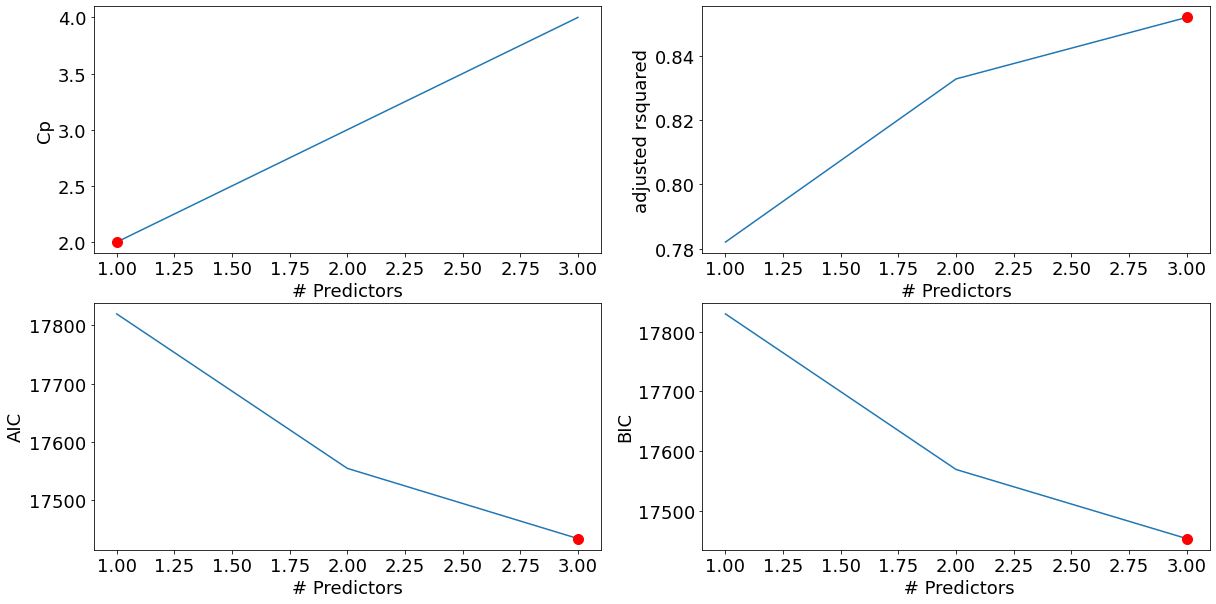

In [52]:
# Plot the result
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 18, "lines.markersize":10})

## Mallow Cp
# 파라미터의 수만큼 패널티를 부여하는 성능 지표..?
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0]+
                               (row[1].mse_total-fitted_full_model.mse_total)*
                               (train_x.shape[0]-row[1].params.shape[0])/
                               fitted_full_model.mse_total), axis=1)

plt.plot(Cp)
plt.plot(Cp.argmin()+1, Cp.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('Cp')

## adj-requared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax()+1, adj_rsquared.max(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

## aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

## bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [55]:
#------- 전진선택법(step=1) -------#
def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print(f'Processed {models.shape[0]} models on {len(predictors)+1} predictors in {toc-tic}')
    print(f'Selected predictors {best_model["model"].model.exog_names} AIC: {best_model[0]}')
    return best_model

In [64]:
#------- 전진선택법 모델 -------#
def forward_model(X, y):
    """
    변수를 하나씩 추가하면서 정확도 비교 후 추가 및 유지
    """
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print(f"Total elapsed time: {toc-tic} seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [65]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.08763790130615234
Selected predictors ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd4016865e0>
Processed 35 models on 2 predictors in 0.048928022384643555
Selected predictors ['Mfg_Year', 'Automatic_airco', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd414467b80>
Processed 34 models on 3 predictors in 0.05254697799682617
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd4144813a0>
Processed 33 models on 4 predictors in 0.05955696105957031
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd3e02ec0d0>
Processed 32 models on 5 predictors in 0.07259321212768555
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'const'

In [68]:
Forward_best_model.aic

17005.01958693686

In [69]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     455.8
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:26:41   Log-Likelihood:                -8480.5
No. Observations:                1005   AIC:                         1.701e+04
Df Residuals:                     983   BIC:                         1.711e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1500.8802     47.862     31.358      0.000    1406.956    1594.804
Automatic_airco   2506.7890    188.641     13.289      0.000    2136.604    2876.974
Weight               9.0126      1.247      7.226      0.000       6.565      11.460
KM                  -0.0161      0.001    -11.785      0.000      -0.019      -0.013
HP                  21.2246      3.704      5.730      0.000      13.955      28.494
Quarterly_Tax       16.4721      1.778      9.266      0.000      12.984      19.961
Petrol           -5.674e+04   1835.385    -30.917      0.000   -6.03e+04   -5.31e+04
Guarantee_Period    79.2303     12.586      6.295      0.000      54.531     103.929
Powered_Windows    417.6592     80.632      5.180      0.000     259.429     575.889
Sport_Model        331.5410     90.167      3.677      0.000     154.599     508.484
Mfr_Guarantee      233.2592     77.888      2.995      0.003      80.413     386.105
ABS               -460.1042    109.277     -4.210      0.000    -674.548    -245.661
Tow_Bar           -216.0592     84.648     -2.552      0.011    -382.171     -49.947
BOVAG_Guarantee    377.1034    131.370      2.871      0.004     119.306     634.901
Boardcomputer     -308.8927    119.633     -2.582      0.010    -543.658     -74.127
Metallic_Rim       211.4991     96.387      2.194      0.028      22.352     400.646
Mfg_Month           19.8607     10.972      1.810      0.071      -1.671      41.392
Radio             -199.2172    108.796     -1.831      0.067    -412.716      14.282
Diesel           -5.789e+04   1838.998    -31.482      0.000   -6.15e+04   -5.43e+04
Doors               71.7921     42.437      1.692      0.091     -11.486     155.070
Automatic          258.8869    165.941      1.560      0.119     -66.753     584.527
Cylinders        -6.934e+05    2.2e+04    -31.491      0.000   -7.37e+05    -6.5e+05
CNG               -5.87e+04   1867.825    -31.429      0.000   -6.24e+04    -5.5e+04
const            -1.733e+05   5504.502    -31.491      0.000   -1.84e+05   -1.63e+05
==============================================================================
Omnibus:                      103.101   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.195
Skew:                           0.119   Prob(JB):                    1.00e-154
Kurtosis:                       7.108   Cond. No.                     1.78e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진소거법

In [73]:
#------- 후진선택법(step=1) -------#
def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합을 확인 (constant는 제거하고,,)
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X=X, y=y, feature_set = list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print(f'Processed {models.shape[0]} models on {len(predictors)-1} predictors in {toc-tic}')
    print(f'Selected predictors {best_model["model"].model.exog_names} AIC: {best_model[0]}')
    return best_model

In [74]:
#------- 후진선택법 모델 -------#
def backward_model(X, y):
    """
    변수를 하나씩 제거하면서 정확도 비교 후 제거 및 유지
    """
    Bmodels = pd.DataFrame(columns=['AIC', 'model'], index=range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [75]:
Backward_best_model = backward_model(X=train_x, y=train_y)

Processed 36 models on 35 predictors in 0.12376809120178223
Selected predictors ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a19c970>
Processed 35 models on 34 predictors in 0.10373401641845703
Selected predictors ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guar

In [76]:
Backward_best_model.aic

17005.019586936884

# 단계적 선택법

In [80]:
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors+['const'])['AIC']
    
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodels_before = Stepmodels.loc[i]['AIC']
    
    toc = time.time()
    print(f"Total elapsed time: {toc-tic} seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [81]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.062374114990234375
Selected predictors ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd4265047c0>
forward
Processed 1 models on 0 predictors in 0.001306772232055664
Selected predictors ['const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd426504df0>
Processed 35 models on 2 predictors in 0.04422879219055176
Selected predictors ['Mfg_Year', 'Automatic_airco', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a196280>
forward
Processed 2 models on 1 predictors in 0.002675771713256836
Selected predictors ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a19c370>
Processed 34 models on 3 predictors in 0.05777287483215332
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper obj

Processed 17 models on 16 predictors in 0.02859187126159668
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a1a8820>
Processed 19 models on 18 predictors in 0.03081798553466797
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'Mfg_Month', 'Radio', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a1356d0>
forward
Processed 18 models on 17 predictors in 0.02669501304626465
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', '

Processed 14 models on 23 predictors in 0.027996063232421875
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'Mfg_Month', 'Radio', 'Doors', 'Automatic', 'Cylinders', 'CNG', 'Age_08_04', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a144d00>
forward
Processed 23 models on 22 predictors in 0.04581189155578613
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'Mfg_Month', 'Radio', 'Doors', 'Automatic', 'Cylinders', 'CNG', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a12f610>
backward
Processed 14 models on 23 predict

Processed 23 models on 22 predictors in 0.05188298225402832
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'Mfg_Month', 'Radio', 'Doors', 'Automatic', 'Cylinders', 'CNG', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a12d5b0>
backward
Processed 14 models on 23 predictors in 0.029449939727783203
Selected predictors ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'ABS', 'Tow_Bar', 'BOVAG_Guarantee', 'Boardcomputer', 'Metallic_Rim', 'Mfg_Month', 'Radio', 'Doors', 'Automatic', 'Cylinders', 'CNG', 'Age_08_04', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd40a196b50>
forward
Processed 23 models on 22 predict

In [82]:
Stepwise_best_model.aic

17005.019586936858

# 성능평가

In [84]:
# The number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (23,) (23,)


In [92]:
# 모델에 의해 예측/추정 되어진 값 <-> test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [93]:
perf_mat = pd.DataFrame(columns=['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                        index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

In [94]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
from sklearn import metrics

#------- 성능지표 -------#
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD       BACKWARD        STEPWISE
MSE   1199575.056545  1199656.711161  1199656.71116  1199656.711157
RMSE     1095.251139     1095.288415    1095.288415     1095.288415
MAE       833.288109      838.669927     838.669927      838.669927
MAPE          8.2945        8.365856       8.365856        8.365856


In [96]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
24
23
23


In [97]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     289.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:59:26   Log-Likelihood:                -8476.2
No. Observations:                1005   AIC:                         1.702e+04
Df Residuals:                     971   BIC:                         1.719e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -489.1872    139.411     -3.509      0.000    -762.770    -215.605
Age_08_04         -123.1777      4.230    -29.118      0.000    -131.479    -114.876
Airbag_1            66.8421    270.965      0.247      0.805    -464.902     598.586
Airbag_2            14.9256    140.870      0.106      0.916    -261.519     291.370
Airco              114.2501     99.790      1.145      0.253     -81.579     310.079
Automatic          269.5772    168.287      1.602      0.110     -60.672     599.826
Automatic_airco   2425.6211    204.359     11.869      0.000    2024.586    2826.656
BOVAG_Guarantee    402.0271    137.781      2.918      0.004     131.643     672.411
Backseat_Divider  -228.5432    142.286     -1.606      0.109    -507.766      50.680
Boardcomputer     -303.5851    124.699     -2.435      0.015    -548.296     -58.874
CD_Player          141.8725    105.482      1.345      0.179     -65.127     348.872
CNG               -973.6299    263.290     -3.698      0.000   -1490.313    -456.947
Central_Lock         4.4267    156.729      0.028      0.977    -303.139     311.993
Cylinders           -0.0338      0.002    -14.467      0.000      -0.038      -0.029
Diesel            -138.0754    203.383     -0.679      0.497    -537.196     261.046
Doors               66.9718     43.630      1.535      0.125     -18.647     152.591
Gears               33.6758    217.184      0.155      0.877    -392.529     459.880
Guarantee_Period    73.4982     13.633      5.391      0.000      46.746     100.251
HP                  20.8092      3.871      5.375      0.000      13.212      28.407
KM                  -0.0162      0.001    -11.780      0.000      -0.019      -0.014
Met_Color          -27.2340     82.329     -0.331      0.741    -188.797     134.330
Metallic_Rim       181.8397    103.501      1.757      0.079     -21.271     384.951
Mfg_Month         -103.0169     11.096     -9.284      0.000    -124.791     -81.242
Mfg_Year             1.9241      0.869      2.214      0.027       0.219       3.629
Mfr_Guarantee      252.2151     79.641      3.167      0.002      95.927     408.504
Mistlamps           72.5273    116.879      0.621      0.535    -156.838     301.892
Petrol            1111.6968    203.154      5.472      0.000     713.026    1510.368
Power_Steering     243.8773    315.960      0.772      0.440    -376.167     863.921
Powered_Windows    331.3203    158.928      2.085      0.037      19.438     643.203
Quarterly_Tax       17.5563      1.935      9.074      0.000      13.759      21.353
Radio            -1513.8664   1167.708     -1.296      0.195   -3805.389     777.656
Radio_cassette    1341.4011   1172.170      1.144      0.253    -958.878    3641.680
Sport_Model        377.3818     97.804      3.859      0.000     185.450     569.314
Tow_Bar           -222.

In [98]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     455.8
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:59:45   Log-Likelihood:                -8480.5
No. Observations:                1005   AIC:                         1.701e+04
Df Residuals:                     983   BIC:                         1.711e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1500.8802     47.862     31.358      0.000    1406.956    1594.804
Automatic_airco   2506.7890    188.641     13.289      0.000    2136.604    2876.974
Weight               9.0126      1.247      7.226      0.000       6.565      11.460
KM                  -0.0161      0.001    -11.785      0.000      -0.019      -0.013
HP                  21.2246      3.704      5.730      0.000      13.955      28.494
Quarterly_Tax       16.4721      1.778      9.266      0.000      12.984      19.961
Petrol            1150.2066    291.050      3.952      0.000     579.056    1721.357
Guarantee_Period    79.2303     12.586      6.295      0.000      54.531     103.929
Powered_Windows    417.6592     80.632      5.180      0.000     259.429     575.889
Sport_Model        331.5410     90.167      3.677      0.000     154.599     508.484
Mfr_Guarantee      233.2592     77.888      2.995      0.003      80.413     386.105
ABS               -460.1042    109.277     -4.210      0.000    -674.548    -245.661
Tow_Bar           -216.0592     84.648     -2.552      0.011    -382.171     -49.947
BOVAG_Guarantee    377.1034    131.370      2.871      0.004     119.306     634.901
Boardcomputer     -308.8927    119.633     -2.582      0.010    -543.658     -74.127
Metallic_Rim       211.4991     96.387      2.194      0.028      22.352     400.646
Mfg_Month           19.8607     10.972      1.810      0.071      -1.671      41.392
Radio             -199.2172    108.796     -1.831      0.067    -412.716      14.282
Doors               71.7921     42.437      1.692      0.091     -11.486     155.070
Automatic          258.8869    165.941      1.560      0.119     -66.753     584.527
Cylinders         -7.07e+05   2.24e+04    -31.495      0.000   -7.51e+05   -6.63e+05
CNG               -809.6394    413.070     -1.960      0.050   -1620.239       0.961
const            -1.768e+05   5612.072    -31.495      0.000   -1.88e+05   -1.66e+05
==============================================================================
Omnibus:                      103.101   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.195
Skew:                           0.119   Prob(JB):                    1.00e-154
Kurtosis:                       7.108   Cond. No.                     7.38e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""